# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aulia Mar'atush Sholekhah
- **Email:** auliams12@gmail.com
- **ID Dicoding:** aulia_mar'atush_sholekhah_FwO7

## Menentukan Pertanyaan Bisnis

- bagaimana jumlah penyewa sepeda berdasarkan cuaca?
- bagaimana jumlah penyewa sepeda berdasarkan bulan

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
day_aul = pd.read_csv("/content/drive/MyDrive/day.csv")
day_aul.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [ ]:
#informasi terkait penyewaan sepeda dala hari
day_aul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_aul.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", day_aul.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_aul.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Cleaning Data

In [ ]:
#mengubah tipe data
day_aul["dteday"] = pd.to_datetime(day_aul["dteday"])
day_aul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_aul.describe(include="all")

<ipython-input-43-dbbbdb9dfbda>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_aul.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


jumlah penyewa sepeda berdasarkan season/musim


In [ ]:
# Menghitung jumlah pengguna sepeda berdasarkan weathersit
jumlah_pengguna_berdasar_weathersit = day_aul.groupby('weathersit')['cnt'].sum()

print("Jumlah pengguna sepeda berdasar weathersit:")
print(jumlah_pengguna_berdasar_weathersit)

Jumlah pengguna sepeda berdasar weathersit:
weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64


karena kode weathersit sebenarnya ada 4, namun di diagram kode -4 tidak muncul karena jumlah penyewa sepeda pada saat cuaca kode-4 adalah 0

In [ ]:
# Menghitung jumlah pengguna sepeda berdasarkan weathersit (cuaca)
jumlah_pengguna_berdasar_cuaca = day_aul.groupby('weathersit')['cnt'].sum()

# Memeriksa apakah weathersit kode 4 ada dalam hasil grup atau tidak
if 4 not in jumlah_pengguna_berdasar_cuaca.index:
    # Jika tidak ada, tambahkan entri dengan nilai 0
    jumlah_pengguna_berdasar_cuaca.loc[4] = 0

print("Jumlah pengguna sepeda berdasarkan cuaca:")
print(jumlah_pengguna_berdasar_cuaca)

Jumlah pengguna sepeda berdasarkan cuaca:
weathersit
1    2257952
2     996858
3      37869
4          0
Name: cnt, dtype: int64


jumlah penyewa sepeda berdasarkan bulan

In [ ]:
# Menghitung jumlah pengguna sepeda per bulan
jumlah_pengguna_per_mnth = day_aul.groupby('mnth')['cnt'].sum()

print("Jumlah pengguna sepeda per bulan:")
print(jumlah_pengguna_per_mnth)

Jumlah pengguna sepeda per bulan:
mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1:bagaimana jumlah penyewa sepeda berdasarkan cuaca?


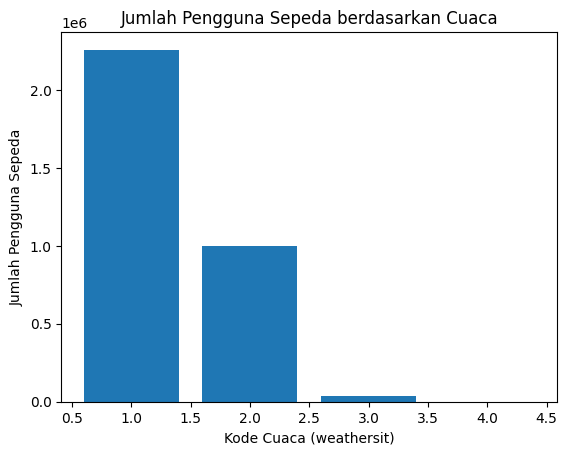

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Dataframe day_aul
# (Assuming that 'day_aul' and other necessary imports are already defined)

# Menghitung jumlah pengguna sepeda berdasarkan weathersit (cuaca)
jumlah_pengguna_berdasar_cuaca = day_aul.groupby('weathersit')['cnt'].sum()

# Memeriksa apakah weathersit kode 4 ada dalam hasil grup atau tidak
if 4 not in jumlah_pengguna_berdasar_cuaca.index:
    # Jika tidak ada, tambahkan entri dengan nilai 0
    jumlah_pengguna_berdasar_cuaca.loc[4] = 0

# Visualisasi dengan bar plot
plt.bar(jumlah_pengguna_berdasar_cuaca.index, jumlah_pengguna_berdasar_cuaca)
plt.xlabel('Kode Cuaca (weathersit)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.title('Jumlah Pengguna Sepeda berdasarkan Cuaca')
plt.show()


### Pertanyaan 2:bagaimana jumlah penyewa sepeda berdasarkan bulan

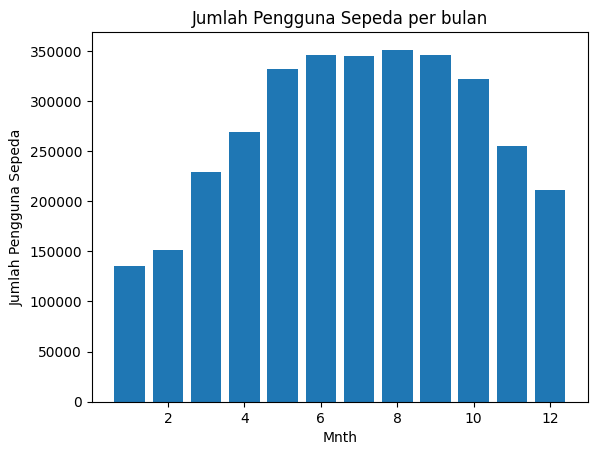

In [ ]:
# Menghitung jumlah pengguna sepeda per bulan
jumlah_pengguna_per_mnth = day_aul.groupby('mnth')['cnt'].sum()

# Visualisasi dengan bar plot
plt.bar(jumlah_pengguna_per_mnth.index, jumlah_pengguna_per_mnth)
plt.xlabel('Mnth')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.title('Jumlah Pengguna Sepeda per bulan')
plt.show()


## Conclusion

- Conclution pertanyaan 1:bagaimana bagaimana jumlah penyewa sepeda berdasarkan cuaca??Berdasarkan analisis, jumlah penyewa sepeda terbanyak pada saat cuaca kode ke-1(Clear, Few clouds, Partly cloudy, Partly cloudy), diikuti dengan kode ke-2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist), lalu kode ke-3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds), dan tidak ada penyewa sepeda yang menyewa pada saat cuaca kode ke-4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
- Conclution pertanyaan 2:Bagaimana jumlah penyewa sepeda berdasarkan bulan? Berdasarkan analisis setiap  bulannya, jumlah penyewa paling banyak berada pada bulan ke-8,dan jumlah penyewa paling sedikit berada pada bulan ke-1.

In [ ]:
day_aul.to_csv("all_data.csv", index=False)